## Linear regression as limiting case of Ridge regression

#### Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})


In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [3]:
# boston=load_boston()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

NameError: name 'boston' is not defined

In [ ]:
#    Alternative datasets include the California housing dataset (i.e.
#    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
#    dataset. You can load the datasets as follows::

#        from sklearn.datasets import fetch_california_housing
#        housing = fetch_california_housing()

In [ ]:
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
boston_df.head()

In [ ]:
newX=boston_df.drop('Price',axis=1)
print newX[0:3] # check 
newY=boston_df['Price']

In [ ]:
#print type(newY)# pandas core frame

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print len(X_test), len(y_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
rr = Ridge(alpha=0.01) 

In [ ]:
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles

In [ ]:
rr.fit(X_train, y_train)

In [ ]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

In [ ]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [ ]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [ ]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [ ]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)

In [ ]:
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 

In [ ]:
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

In [ ]:
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

### Lasso

In [1]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np


In [2]:
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected

In [3]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
cancer = load_breast_cancer()
#print cancer.keys()

In [5]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X = cancer.data
Y = cancer.target

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

In [8]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [9]:
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.5600974529893081
test score:  0.5832244618818156
number of features used:  4


In [10]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=1000000.0)

In [11]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)


In [12]:
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.7037865778498826
test score for alpha =0.01:  0.6641831577726227
number of features used: for alpha =0.01: 10


In [13]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, max_iter=1000000.0)

In [14]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)


In [15]:
print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.7754092006936699
test score for alpha =0.0001:  0.7318608210757909
number of features used: for alpha =0.0001: 22


In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [17]:
print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)

LR training score: 0.784220619405507
LR test score:  0.7329325010888702


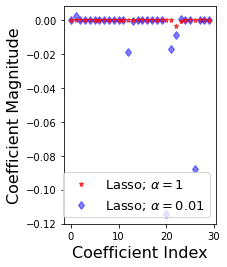

In [18]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

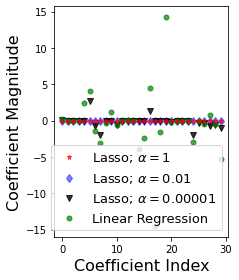

In [19]:
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [ ]:
#output 
#training score: 0.5600974529893081
#test score:  0.5832244618818156
#number of features used:  4
#training score for alpha=0.01: 0.7037865778498829
#test score for alpha =0.01:  0.664183157772623
#number of features used: for alpha =0.01: 10
#training score for alpha=0.0001: 0.7754092006936697
#test score for alpha =0.0001:  0.7318608210757904
#number of features used: for alpha =0.0001: 22
#LR training score: 0.7842206194055068
#LR test score:  0.7329325010888681

## Multiple linear regression

In [20]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
url = "50_Startups.csv"
df = pd.read_csv(url)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
X = df.drop('Profit', axis=1)
y = df.Profit
X.shape

(50, 4)

In [23]:
#Convert the column into categorical columns

states=pd.get_dummies(X['State'],drop_first=True)


In [24]:
# Drop the state column
X=X.drop('State',axis=1)


In [25]:
# concat the dummy variables
X=pd.concat([X,states],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [27]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [28]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [29]:
# importing the r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 score is', score)
print("mean_squared_error is ==",mean_squared_error(y_test, y_pred))
print("root_mean_squared error is ==",np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score is 0.9347068473282423
mean_squared_error is == 83502864.03257757
root_mean_squared error is == 9137.990152794955


In [ ]:
# You can see that the accuracy score is greater than 0.8 it means we can use this model  
# to solve multiple linear regression, and also mean squared error rate is also low.